Diamond Price Prediction
Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [1]:
import pandas as pd


In [3]:
## Data Ingestions step
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/FSDSRegression/main/notebooks/data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df_new = df.copy()

In [5]:
df_new.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing value present in data

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
###Drop the id column as it is not really relevent to data
df_new=df_new.drop(labels=["id"],axis=1)

In [8]:
df_new.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
###check duplicated records
df_new.duplicated().sum()

0

In [10]:
##segregate numerical and categorical colums
numerical_columns=df_new.columns[df_new.dtypes!="object"]

In [11]:
categorical_columns=df_new.columns[df_new.dtypes=="object"]

In [12]:
print("numerical_columns:", numerical_columns)
print("categorical_columns:", categorical_columns)

numerical_columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical_columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [13]:
df_new[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [14]:
df_new["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [15]:
df_new["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [16]:
df_new["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [17]:
df_new["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

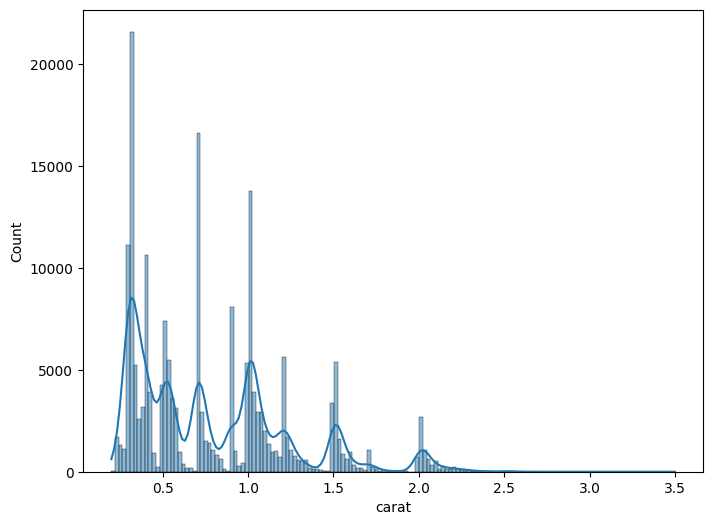

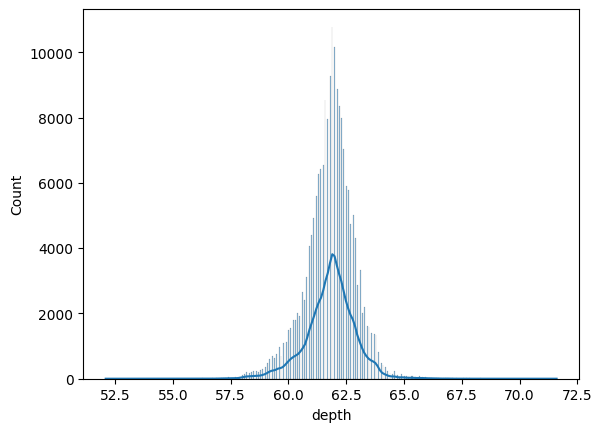

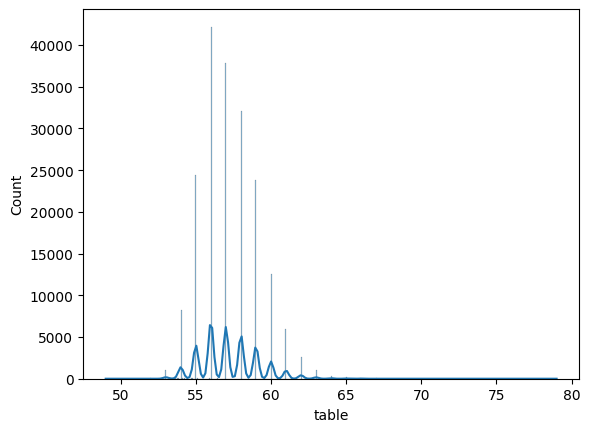

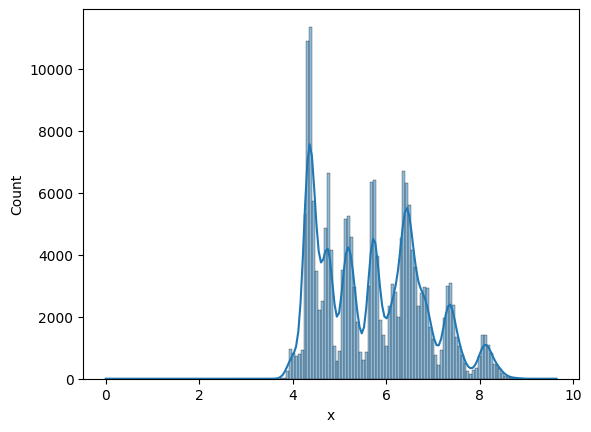

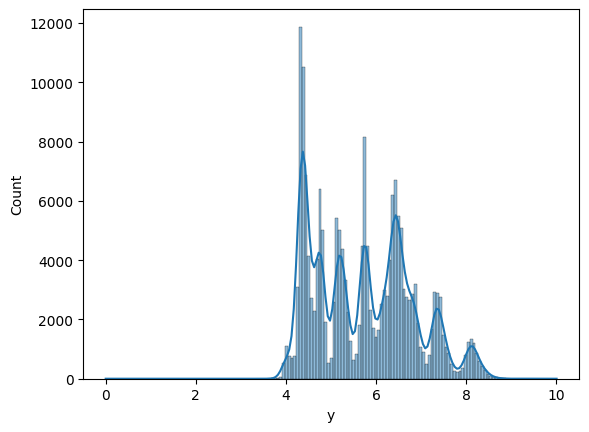

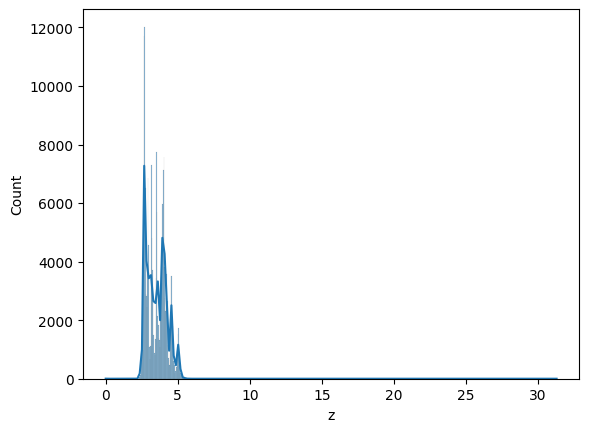

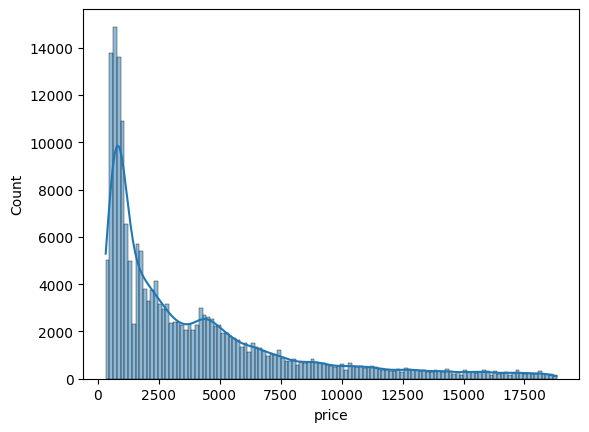

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df_new,x=i,kde=True)
    print('\n')
    plt.show()

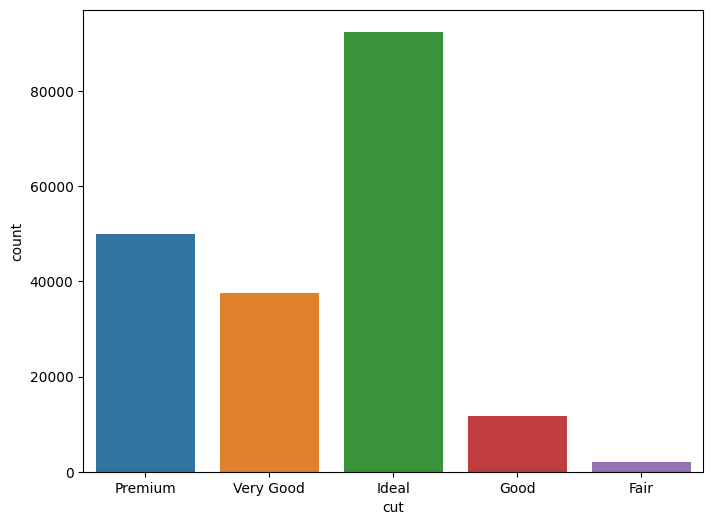

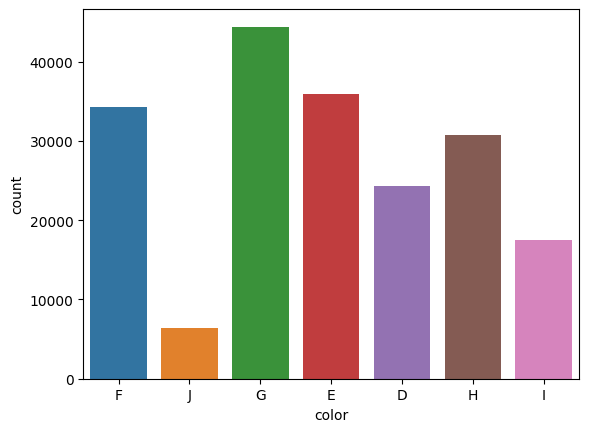

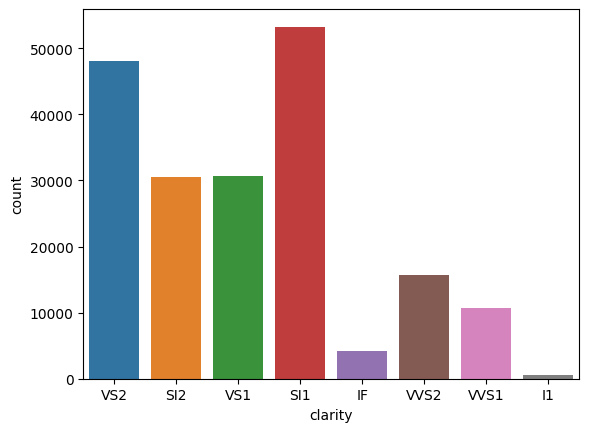

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.countplot(data=df_new,x=i)
    print('\n')
    plt.show()

<Axes: >

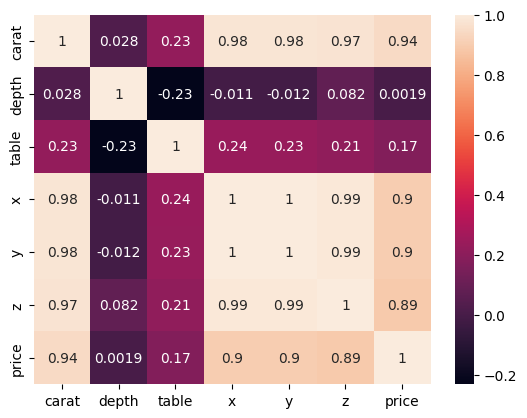

In [20]:
## correlation
sns.heatmap(df_new.corr(numeric_only=True),annot=True)

In [21]:
###df_new.drop(labels=["x","y","z"],axis=1)
# execute it later

In [22]:
df1=df_new.sample(50)

In [23]:
df1

,carat,cut,color,clarity,depth,table,x,y,z,price
91160,0.50,Ideal,E,VS2,62.1,57.0,5.06,5.09,3.16,1637
113526,0.32,Ideal,D,SI1,62.2,54.0,4.38,4.39,2.73,756
71662,0.30,Ideal,F,IF,62.0,55.0,4.31,4.34,2.68,886
99386,0.70,Premium,F,SI1,61.8,55.0,5.73,5.71,3.54,2391
126251,0.71,Ideal,F,SI2,62.0,56.0,5.73,5.76,3.56,2056
74266,0.90,Ideal,F,SI1,62.3,57.0,6.20,6.14,3.84,3918
45385,0.55,Ideal,E,SI2,62.2,56.0,5.26,5.29,3.28,1435
139567,0.30,Ideal,G,VVS1,61.5,57.0,4.31,4.33,2.65,790
62506,1.52,Premium,E,VS1,60.4,59.0,7.48,7.46,4.51,13767
190477,0.70,Premium,F,VS1,61.0,60.0,5.74,5.67,3.49,2801


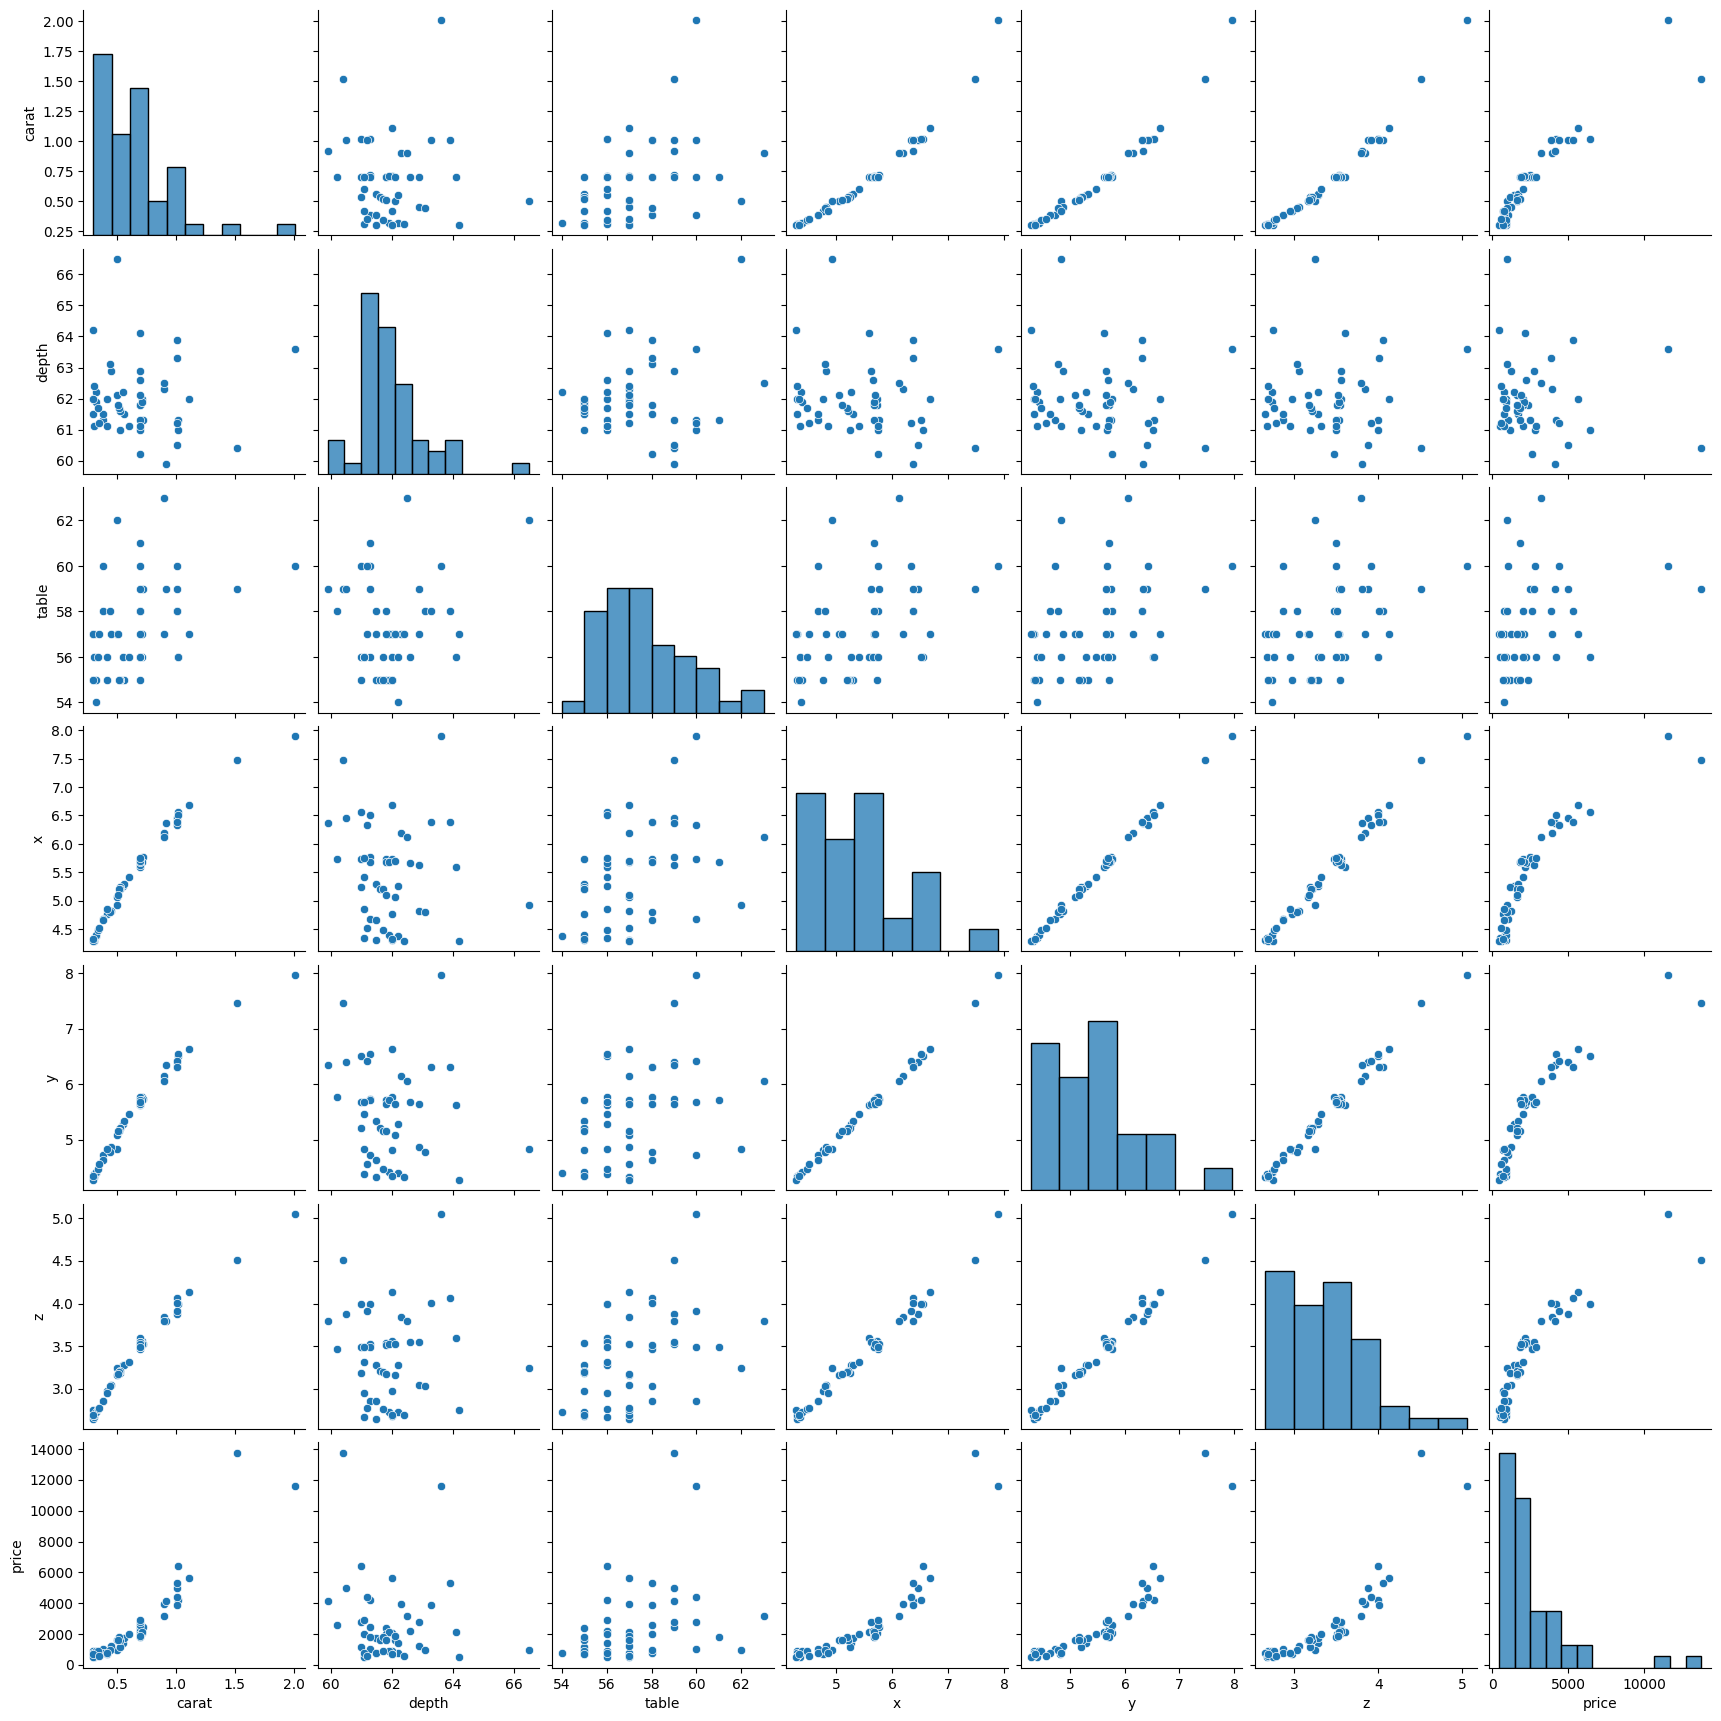

In [24]:
sns.pairplot(df1)

In [25]:
df_new['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [26]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [27]:
df_new['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [28]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [29]:
df_new['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [30]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [31]:
df_new['cut']=df_new['cut'].map(cut_map)
df_new['clarity'] = df_new['clarity'].map(clarity_map)
df_new['color'] = df_new['color'].map(color_map)

In [32]:
df_new.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
